In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Analysis

In [2]:
df = pd.read_csv("Height-Width.csv")
df.head()

,Height,Width
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


#### Insights

In [3]:
df.describe()

,Height,Width
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [4]:
df.shape

(3501, 2)

#### Null data

In [5]:
df.isnull().sum()

Height    0
Width     0
dtype: int64

### Visualization

Text(0, 0.5, 'Width')

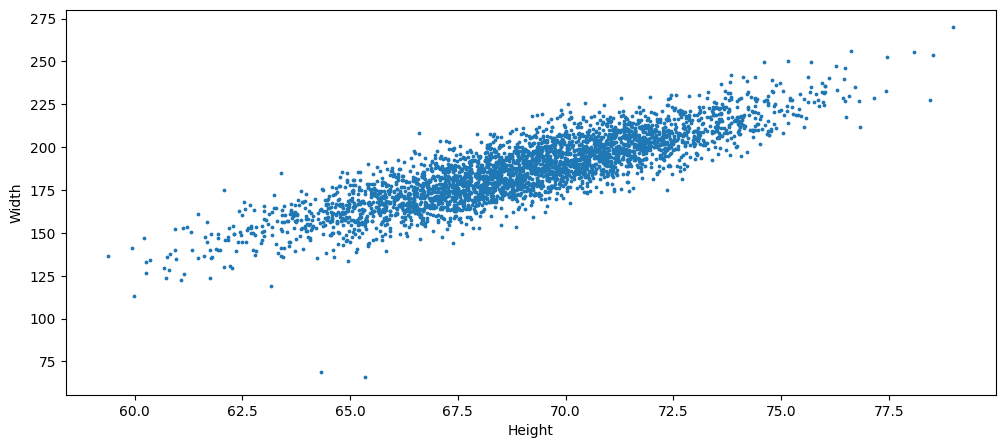

In [6]:
plt.figure(figsize=(12,5))
plt.scatter(df.Height, df.Width, s=3)
plt.xlabel("Height")
plt.ylabel("Width")

#### Training & Testing set

In [7]:
X = df[['Height']]
y = df['Width']

In [8]:
from sklearn.model_selection import train_test_split as tts

In [9]:
xtrain,xtest,ytrain,ytest = tts(X,y,test_size=0.3,random_state=5)

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [11]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [12]:
m = reg.coef_
m

array([6.00809929])

In [13]:
c = reg.intercept_
c

-227.77595602223423

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
reg.predict([[43]])

array([30.57231324])

In [16]:
ypred = reg.predict(xtest)
ypred

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [17]:
df["Predicted Result"] = reg.predict(X)
df.head()

,Height,Width,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812


### Accuracy

In [18]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7302328605746943

### MAE & MSE Error

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mse = mean_squared_error(ytest,ypred)
mse

102.60138482843213

In [21]:
mae = mean_absolute_error(ytest,ypred)
mae

8.061150778858023

### Best Fit Line

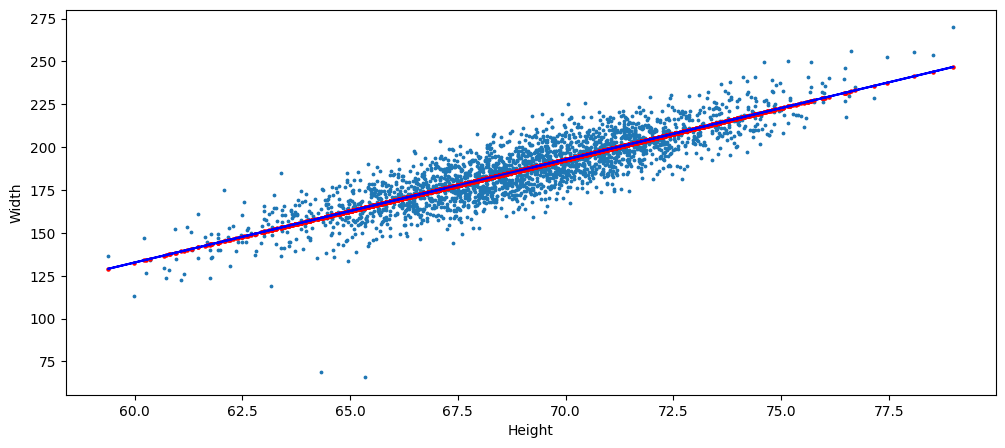

In [22]:
plt.figure(figsize=(12,5))
plt.xlabel("Height")
plt.ylabel("Width")
plt.scatter(xtrain, ytrain, s=3)
plt.plot(xtrain, reg.predict(xtrain), color="blue")
plt.scatter(xtrain, reg.predict(xtrain), s=5, color="red")

### Save Model

Saving model using Pickle

In [23]:
import pickle as pk
pk.dump(reg,open("m1","wb"))

In [24]:
reg2 = pk.load(open("m1","rb"))

In [25]:
reg2.predict([[72]])

array([204.8071925])

Saving model using Joblib

In [26]:
import joblib as jb
jb.dump(reg, "m2")

['m2']

In [27]:
reg3 = jb.load("m2")

In [28]:
reg3.predict([[56]])

array([108.67760394])